In [18]:
# in this project, I implement a logistic regression algorithm to predict if a pacient has diabetes or not
# based on other characteristics, represented by the the variables the following variables: age, gender; 
# other binary variables used as an input to determine the independent binary variable, Y (diabetes or not):
# polyuria, polydipsia, sudden_weight_loss, weakness, polyphagia, genital_thrush, visual_blurring, itching,
# irritability, delayed_healing, partial_paresis, muscle_stiffness, alopecia, and obesity. 
# we have a dataset with data on the dependent variable for 519 patients. the dataset was downloaded from 
# the public machine learning repository http://archive.ics.uci.edu/ml/index.php. 

# 25% of the dataset was split to be used as test, the remaining data to train the model. 
# overall, the the model presented an accuracy of 93%

In [ ]:
import pandas as pd

data = pd.read_csv("diabetes_data.csv")

In [2]:
data.head()

,AGE,GENDER,POLYURIA,POLYDIPSIA,SUDDEN_WEIGHT_LOSS,WEAKNESS,POLYPHAGIA,GENITAL_THRUSH,VISUAL_BLURRING,ITCHING,IRRITABILITY,DELAYED_HEALING,PARTIAL_PARESIS,MUSCLE_STIFFNESS,ALOPECIA,OBESITY,Y
0,40.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
1,58.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,41.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3,45.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,60.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [3]:
data.columns

Index(['AGE', 'GENDER', 'POLYURIA', 'POLYDIPSIA', 'SUDDEN_WEIGHT_LOSS',
       'WEAKNESS', 'POLYPHAGIA', 'GENITAL_THRUSH', 'VISUAL_BLURRING',
       'ITCHING ', 'IRRITABILITY', 'DELAYED_HEALING', 'PARTIAL_PARESIS ',
       'MUSCLE_STIFFNESS', 'ALOPECIA', 'OBESITY', 'Y'],
      dtype='object')

In [4]:
data.isnull().values.any()

False

In [5]:
def plot_corr(df, size=15):
    
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

In [6]:
data.corr()

,AGE,GENDER,POLYURIA,POLYDIPSIA,SUDDEN_WEIGHT_LOSS,WEAKNESS,POLYPHAGIA,GENITAL_THRUSH,VISUAL_BLURRING,ITCHING,IRRITABILITY,DELAYED_HEALING,PARTIAL_PARESIS,MUSCLE_STIFFNESS,ALOPECIA,OBESITY,Y
AGE,1.000000,-0.062872,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679
GENDER,-0.062872,1.000000,0.268894,0.312262,0.281840,0.124490,0.219968,-0.208961,0.208092,0.052496,0.013735,0.101978,0.332288,0.090542,-0.327871,0.005396,0.449233
POLYURIA,0.199781,0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
POLYDIPSIA,0.137382,0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
SUDDEN_WEIGHT_LOSS,0.064808,0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
WEAKNESS,0.224596,0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
POLYPHAGIA,0.315577,0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
GENITAL_THRUSH,0.096519,-0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
VISUAL_BLURRING,0.402729,0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
ITCHING,0.296559,0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384


In [7]:
feature_cols = ['AGE', 'GENDER', 'POLYURIA', 'POLYDIPSIA', 'SUDDEN_WEIGHT_LOSS', 'WEAKNESS', 'POLYPHAGIA', 
             'GENITAL_THRUSH', 'VISUAL_BLURRING', 'ITCHING ', 'IRRITABILITY', 'DELAYED_HEALING', 
             'PARTIAL_PARESIS ', 'MUSCLE_STIFFNESS', 'ALOPECIA', 'OBESITY']

X = data[feature_cols]
y = data.Y

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
X_train
y_train

179    1.0
322    0.0
196    1.0
144    1.0
124    1.0
      ... 
70     1.0
277    0.0
9      1.0
359    1.0
192    1.0
Name: Y, Length: 390, dtype: float64

In [9]:
X_train

,AGE,GENDER,POLYURIA,POLYDIPSIA,SUDDEN_WEIGHT_LOSS,WEAKNESS,POLYPHAGIA,GENITAL_THRUSH,VISUAL_BLURRING,ITCHING,IRRITABILITY,DELAYED_HEALING,PARTIAL_PARESIS,MUSCLE_STIFFNESS,ALOPECIA,OBESITY
179,35.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
322,64.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
196,66.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
144,68.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
124,38.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,40.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,70.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
359,48.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000).fit(X_train,y_train)

y_pred = logreg.predict(X_test)

In [11]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[50,  6],
       [ 3, 71]])

In [12]:
print("Classification Report")
print("Accuracy: {0: .4f}".format(metrics.accuracy_score(y_test, y_pred)))
print(metrics.classification_report(y_test, y_pred, labels=[1.0]))

Classification Report
Accuracy:  0.9308
              precision    recall  f1-score   support

         1.0       0.92      0.96      0.94        74

   micro avg       0.92      0.96      0.94        74
   macro avg       0.92      0.96      0.94        74
weighted avg       0.92      0.96      0.94        74



In [13]:
# logistic regression with different parameters

lr_model = LogisticRegression(C=0.7, random_state=42, solver='newton-cg', max_iter=500)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test, labels=[1,0]))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test, labels=[1,0]))

Accuracy: 0.9308
[[71  3]
 [ 6 50]]

Classification Report
              precision    recall  f1-score   support

           1       0.92      0.96      0.94        74
           0       0.94      0.89      0.92        56

    accuracy                           0.93       130
   macro avg       0.93      0.93      0.93       130
weighted avg       0.93      0.93      0.93       130



In [14]:
# Charts:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

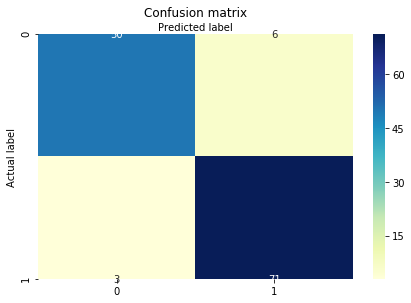

In [15]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#create a heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [16]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.9307692307692308
Precision: 0.922077922077922
Recall: 0.9594594594594594


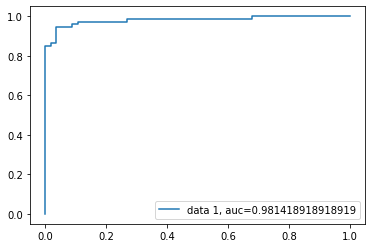

In [17]:
y_pred_probability = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probability)
auc = metrics.roc_auc_score(y_test, y_pred_probability)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()